<a href="https://colab.research.google.com/github/RishiShah99/SecurityFootageTracker/blob/main/Human_Pose_Estimation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pose Estimation Model

* This model will take an image, and using the Keypoint RCNN neural network, we will conduct pose estimation
* This model will be used in a security footage tracker that I am making with openCV to show how the humans are moving


In [30]:
# Necessary Imports
import torch
import torchvision
import numpy as np
import cv2
from PIL import Image
from torchvision.transforms import transforms as transforms
from google.colab import files
import matplotlib.pyplot as plt

# Check Version of Torch Installed
print(torch.__version__)

2.3.0+cu121


In [31]:
# Upload your image using the file upload function
uploaded = files.upload()

# Assuming only one file is uploaded, get its name
image_path = list(uploaded.keys())[0]

transform = transforms.Compose([
    transforms.ToTensor(),
])

Saving frame_19.jpg to frame_19.jpg


In [32]:
# Initialize Model
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True, num_keypoints=17)

# Set Device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device).eval()

image = Image.open(image_path).convert('RGB')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=KeypointRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=KeypointRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [33]:
# NumPy copy of the image for OpenCV functions
orig_numpy = np.array(image, dtype=np.float32)
orig_numpy = cv2.cvtColor(orig_numpy, cv2.COLOR_RGB2BGR)/255
image = transform(image)
image = image.unsqueeze(0).to(device)

In [34]:
with torch.no_grad():
    outputs = model(image)


In [35]:
# Function to draw keypoints
def draw_keypoints(outputs, image):
    keypoints = outputs[0]['keypoints'].cpu().numpy()
    scores = outputs[0]['scores'].cpu().numpy()
    for idx, score in enumerate(scores):
        if score > 0.5:  # You can adjust this threshold
            kpts = keypoints[idx]
            for kpt in kpts:
                cv2.circle(image, (int(kpt[0]), int(kpt[1])), 3, (0, 255, 0), -1)
    return image

In [36]:
output_image = draw_keypoints(outputs, orig_numpy)

In [37]:
# Save the model
torch.save(model.state_dict(), "model.pth")

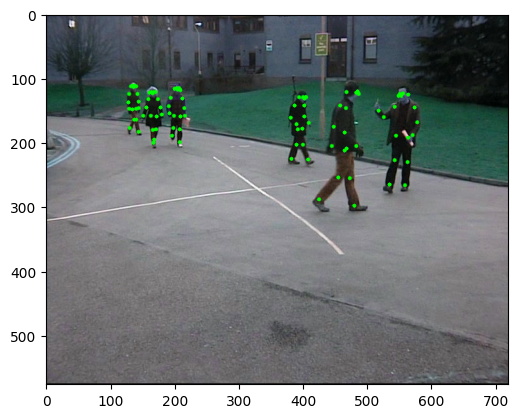

In [38]:
# Display the image
plt.imshow(output_image)
plt.show()